### SVM
SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

ajánlott irodalom: [here](https://towardsdatascience.com/support-vector-machine-explained-8bfef2f17e71), [here](https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/)

In [1]:
from IPython.display import Image
Image("img/svm.png",width=300)

FileNotFoundError: No such file or directory: 'img/svm.png'

FileNotFoundError: No such file or directory: 'img/svm.png'

<IPython.core.display.Image object>

#### Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

#### Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

#### Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

#### How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.



In [ ]:
Image("img/svm2.png",width=600)

FileNotFoundError: No such file or directory: 'img/svm2.png'

FileNotFoundError: No such file or directory: 'img/svm2.png'

<IPython.core.display.Image object>

#### Dealing with non-linear and inseparable planes
Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2+y^2). Now you can easily segregate these points using linear separation.

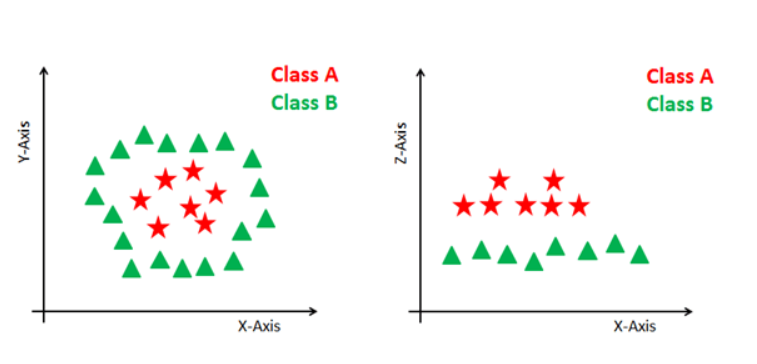

In [ ]:
Image("img/svm3.png",width=600)

### Exercise

In [1]:
# Load the built-in breast_cancer dataset: cancer
# NOTE: from sklearn datasets (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
data = load_breast_cancer()


In [2]:
# print the names of the 13 features
print(data.feature_names)

# print the label type of cancer  =>  target_names
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [3]:
# print the cancer data (top 3 records)

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

cancerDf = sklearn_to_df(data)
print(cancerDf.head(3))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \


In [4]:
# print the cancer labels (0:malignant, 1:benign)
print(cancerDf["target"])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32


In [5]:
# Split dataset into training set and test set (sklearn train_test_split)
X = cancerDf.iloc[:, :-1]
y = cancerDf.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Create a svm Classifier: clf (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
from sklearn.svm import SVC
# Use linear kernel
svc = SVC(kernel='linear')


# Train (fit) the model using the training sets
svc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svc.predict(X_test)

In [7]:
# Model Accuracy: how often is the classifier correct?
# https://www.javatpoint.com/accuracy_score-in-sklearn

print(accuracy_score(y_test, y_pred))

0.9574468085106383


# Model Precision: what percentage of positive predictions are truly positive?


# Model Recall: what percentage of positive datapoints are labelled as such?


#### Tuning Hyperparameters
* **Kernel:** The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
* **Regularization:** Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
* **Gamma:** A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

In [ ]:
"""
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
"""

In [9]:
from sklearn.model_selection import GridSearchCV
#(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf', 'linear']}

# Check how the function GridSearchCV works
# Use it with estimator SVC and with the above-given param_grid
# Set the verbose parameter to at least 1
clf = GridSearchCV(svc, param_grid, verbose = 5)

# Fit the created grid model on your train data
clf.fit(data.data, data.target)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.939 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [ ]:
# Print best parameter after tuning 
# (your created grid model has a function named best_params_)
print(clf.best_params_)

# Print how our model looks after hyper-parameter tuning
# (check the best_estimator_ function)
print(clf.best_estimator_)

In [ ]:
# Predict with the help of your new model: grid_predictions
# As usual, this model also has a 'predict' function
y_pred = clf.predict(X_test)



In [ ]:
# Evaluate your model: print its accuracy, precision and recall values

def scores(y_test, y_pred):
    print(accuracy_score(y_test, y_pred))
    print(precision_score(y_test, y_pred))
    print(recall_score(y_test, y_pred))
    
scores(y_test, y_pred)